# Melody Detection

This file is for experimenting with the Essentia library.

In [1]:
# For embedding audio player
import IPython

# Plots
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6)

import numpy

Duration of the audio sample [sec]:
3.0


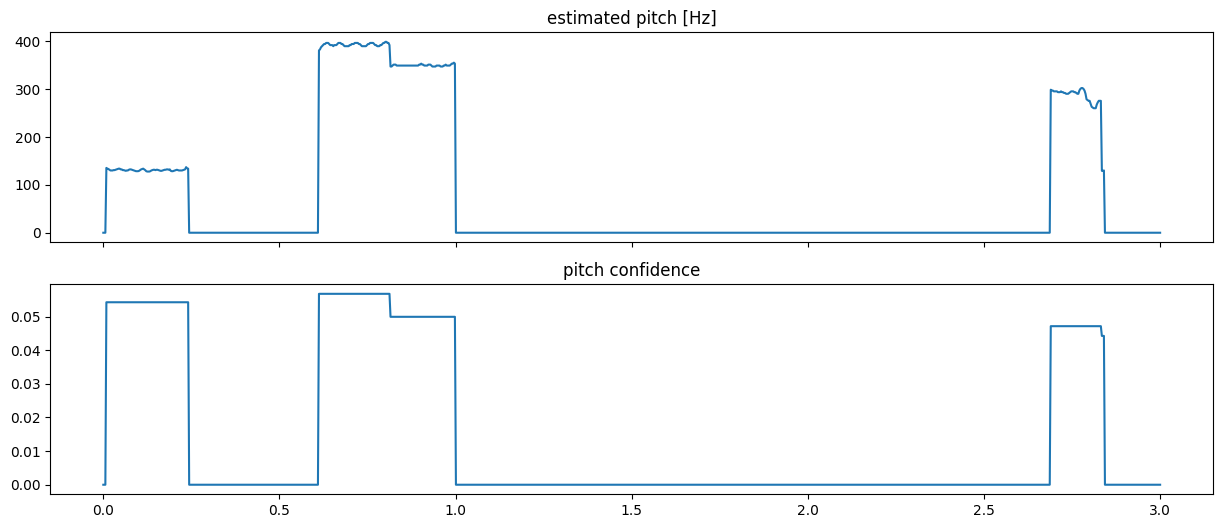

In [2]:
import essentia.standard as es

filepath = '../../data/audio/ron-minis-cut-2.mp3'

# Load audio file.
# It is recommended to apply equal-loudness filter for 
# PredominantPitchMelodia.
loader = es.EqloudLoader(filename=filepath, sampleRate=44100)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required).

pitch_extractor = es.PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames. Compute frame time positions.
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time.
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()


In [3]:
IPython.display.Audio(filepath)

In [4]:
from mir_eval.sonify import pitch_contour

# from tempfile import TemporaryDirectory
# temp_dir = TemporaryDirectory()
temp_dir = '../../data/audio/out/'

In [5]:
# Essentia operates with float32 ndarrays instead of float64, so let's cast it.
synthesized_melody = pitch_contour(pitch_times, pitch_values, 44100).astype(numpy.float32)[:len(audio)]

In [6]:
es.AudioWriter(filename=temp_dir + 'flamenco_melody.wav', format='wav')(es.StereoMuxer()(audio, synthesized_melody))

# Convert mono signal to stereo by duplicating the channel
synthesized_melody_stereo = numpy.vstack([synthesized_melody, synthesized_melody]).T

# Write the stereo melody to a file
es.AudioWriter(filename=temp_dir + 'flamenco_melody_synthesized.wav', format='wav')(synthesized_melody_stereo)

IPython.display.Audio(temp_dir + 'flamenco_melody.wav')

[wav @ 0x11e186c00] Using AVStream.codec.time_base as a timebase hint to the muxer is deprecated. Set AVStream.time_base instead.
[wav @ 0x11e186c00] Encoder did not produce proper pts, making some up.
[wav @ 0x10e813c00] Using AVStream.codec.time_base as a timebase hint to the muxer is deprecated. Set AVStream.time_base instead.
